In [1]:
# Insert a line to document what this Python code Jupyter Notebook is for.
#A6 Student Exam performance CSV Dataset - For  programing data visualizaitons that show Relatioships

In [2]:
# Insert a line to document your dataset source and any needed notes.
# Dataset source: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

In [3]:
# All lines beginning with the # symbol are comments and therefore will not be treated as executable code.
# If you want to "uncomment" a line, simply remove the # symbol from the beginning of the line and it will then be treated as executable code.

In [4]:
# The code lines of this notebook must be run in the order in which they are presented. Running them out of order will cause errors.

In [3]:
# Insert a line to document what this code block is for.
#Importing the pipelite as wrapper and installing libraries
# Insert a line of code for importing piplite and document what that code line is for.
import piplite # for importyng piplite as a wraper to install sesion based libraries
# Insert a line of code to tell Jupyterlite that you want it to install seaborn in the piplite wrapper if it is ever called on later. And then document what that code line is for.
await piplite.install("seaborn") # for installing seaborn in the piplite wrapper

In [4]:
# Insert a line to document what this code block is for.
#import the necessary libraries
# Insert a line of code for importing seaborn as sns and document what that code line is for.
import seaborn as sns # for plotting

# Insert a line of code for importing pandas as pd and document what that code line is for.
import pandas as pd # for data processing

import numpy as np # New-to-you code. For scientific computing.

import pandas.testing as tm # New-to-you code. For comparing groups.

# Insert a line of code for importing matplotlib.pyplot as plt and document what that code line is for.
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates # New-to-you code. For creating parallel coordinates.

In [5]:
# For importing a CSV dataset
# Insert a line of code to import the StudentsPerformance.csv dataset and call it "df" and document what that code line is for.
df = pd.read_csv("StudentsPerformance.csv")

In [6]:
# See what variables (columns) are in the dataset and inspect for any oddities.
# Insert a line of code to show the first five rows of the dataset you called "df" and document what that code line is for.
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# Space intentionally blank to separate sections.

In [10]:
# Space intentionally blank to separate sections.

In [11]:
# The next few code blocks are for doing some required data processing with this dataset so that we can make data visualizations.

In [7]:
# New-to-you code
# Create a list of the numerical features in the dataset for later use
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features # To look at the list of the numerical features found in the dataset

['math score', 'reading score', 'writing score']

In [8]:
# New-to-you code
# Create a list of the categorical features in the dataset for later use
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features # To look at the list of the categorical features found in the dataset

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [9]:
# New-to-you code
# Rename some variables of interest (columns) so that we can optimize them for data visualization
df.rename(columns = {"race/ethnicity":"Ethnicity", "math score":"Math", "reading score":"Reading", "writing score":"Writing"}, inplace = True) # You could the same thing with other variables of interest if you wanted to or needed to.
print(df.columns) # Look at the result.

Index(['gender', 'Ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'Math', 'Reading', 'Writing'],
      dtype='object')


In [10]:
# New-to-you code
# Create new features (columns)
# Create a new total score feature based on the three exam scores contained in this dataset
df['Total Score'] = (df['Math'] + df['Reading'] + df['Writing'] )
# Create a new average score feature based on the three exam scores contained in this dataset
df['Average Score'] = df['Total Score']/3
df.head() # To show the first five rows of the revised dataset to see the result of our work

,gender,Ethnicity,parental level of education,lunch,test preparation course,Math,Reading,Writing,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [11]:
# New-to-you code
# Make a new dataframe with only selected variables of interest
df_ethnicity = df[['Ethnicity', 'Math', 'Reading', 'Writing']].copy()
print(df_ethnicity) # To view the new dataframe

    Ethnicity  Math  Reading  Writing
0     group B    72       72       74
1     group C    69       90       88
2     group B    90       95       93
3     group A    47       57       44
4     group C    76       78       75
..        ...   ...      ...      ...
995   group E    88       99       95
996   group C    62       55       55
997   group C    59       71       65
998   group D    68       78       77
999   group D    77       86       86

[1000 rows x 4 columns]


In [12]:
# New-to-you code
# Create a pivot table where we group the data by a categorical (nominal) variable of interest and show the average exam scores for each.
pivot = np.round(df.pivot_table(index =['Ethnicity'],
                       values =['Math', 'Reading', 'Writing'],
                       aggfunc ='mean'), 2)
print(pivot) # To show the results

            Math  Reading  Writing
Ethnicity                         
group A    61.63    64.67    62.67
group B    63.45    67.35    65.60
group C    64.46    69.10    67.83
group D    67.36    70.03    70.15
group E    73.82    73.03    71.41


In [13]:
# New-to-you code
# Convert the pivot table to a new DataFrame
performance_by_ethnicity = pivot.reset_index()
performance_by_ethnicity # To view the new dataframe

,Ethnicity,Math,Reading,Writing
0,group A,61.63,64.67,62.67
1,group B,63.45,67.35,65.60
2,group C,64.46,69.10,67.83
3,group D,67.36,70.03,70.15
4,group E,73.82,73.03,71.41


In [19]:
# Space intentionally blank to separate sections.

In [20]:
# Space intentionally blank to separate sections.

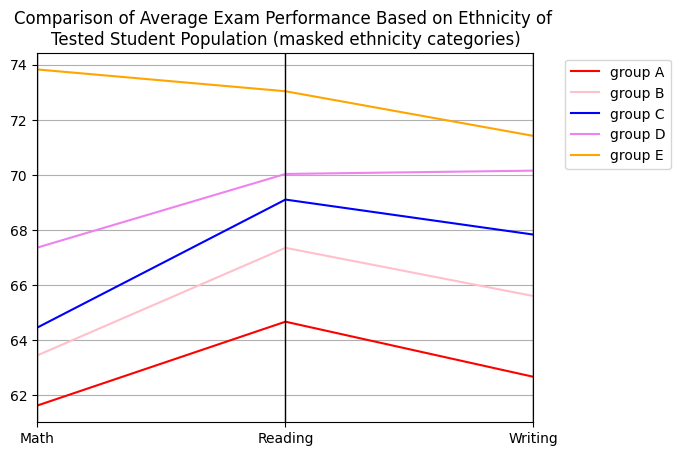

In [15]:
# New-to-you code
# Make a Parallel Coordinates plot
parallel_coordinates(performance_by_ethnicity, 'Ethnicity', color=["red", "pink","blue", "violet", "orange"]) # Customize your colors here. You could also choose a different categorical variable (nominal level of measurement) if you wanted to or needed to.
plt.title("Comparison of Average Exam Performance Based on Ethnicity of \nTested Student Population (masked ethnicity categories)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') # To move the legend outside of the plot so that we can see all of the lines in the chart. You can adjust the values to fine-tune its position.
# Insert a line here to save the DV to a file called "Student_Exam_Performance-Parellel_Coordinates_Plot-Python.png" and document what that code line is for.
plt.savefig("Student_Exam_Performance-Parellel_Coordinates_Plot-Python.png")
plt.show() # To show the chart. You don't always need this; it depends on the development environment.
# Explore the source from which this code was adapted: https://www.kaggle.com/code/crklausenburg/multivariate
# Experiment with customizing your parallel coordinates plot: https://www.python-graph-gallery.com/parallel-plot/
# Experiment with customizing your colors by choosing different "Named Colors" from: https://matplotlib.org/stable/gallery/color/named_colors.html

In [22]:
# Space intentionally blank to separate sections.

In [23]:
# Space intentionally blank to separate sections.

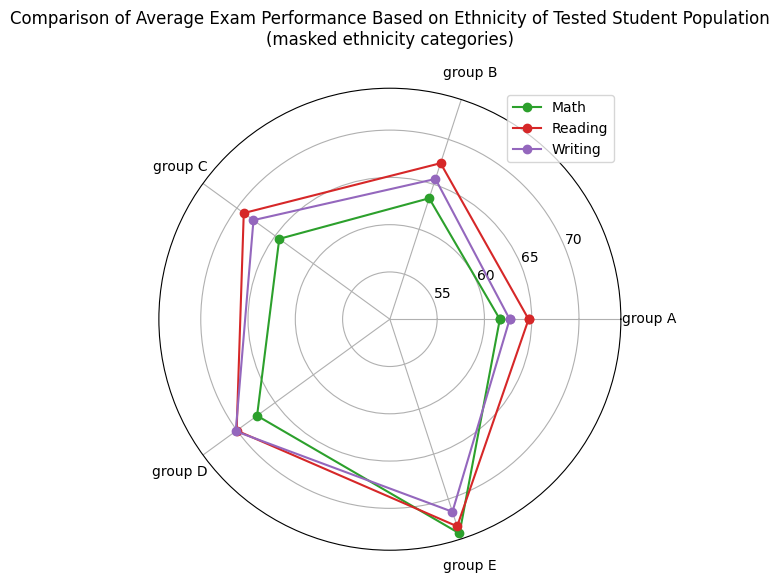

In [17]:
# New-to-you code
# Make a Radar Chart (Polar Chart)
# Plot the figure and customize
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="polar")
theta = np.arange(len(performance_by_ethnicity) + 1) / float(len(performance_by_ethnicity)) * 2 * np.pi
values1 = performance_by_ethnicity['Math'].values
values1 = np.append(values1, values1[0])
values2 = performance_by_ethnicity['Reading'].values
values2 = np.append(values2, values2[0])
values3 = performance_by_ethnicity['Writing'].values
values3 = np.append(values3, values3[0])
# Draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values1, color="C2", marker="o", label="Math")
l2, = ax.plot(theta, values2, color="C3", marker="o", label="Reading")
l3, = ax.plot(theta, values3, color="C4", marker="o", label="Writing")
plt.xticks(theta[:-1], performance_by_ethnicity['Ethnicity'], color='black', size=10) # You can adjust the font size and color of the ethnicity labels here.
ax.tick_params(pad=10) # To adjust the distance of the labels to the plot
ax.set_ylim(50) # To set a new min of the axis (instead of zero); you can experiment with this.

# Optional customizations to go in this section
# Fill the area of the polygon with green, red, purple, and some transparency
#ax.fill(theta, values1, 'green', alpha=0.05) # Uncomment this code line if you want to fill the polygons of your radar chart. Experiment with the transparency level.
#ax.fill(theta, values2, 'red', alpha=0.05) # Uncomment this code line if you want to fill the polygons of your radar chart. Experiment with the transparency level.
#ax.fill(theta, values3, 'purple', alpha=0.05) # Uncomment this code line if you want to fill the polygons of your radar chart. Experiment with the transparency level.

ax.set_title("Comparison of Average Exam Performance Based on Ethnicity of Tested Student Population\n(masked ethnicity categories)", pad=15) # To adjust the position of the title to ensure that there is enough space between it and the chart.
#plt.title("Comparison of Average Exam Performance Based on Ethnicity of Tested Student Population\n(masked ethnicity categories)").set_position([0.5, 1.10]) # In some development environments, the above line doesn't work and this one does (and vice versa).
plt.legend(loc="best") # Shows the legend, using the label of the line plot (useful when there is more than 1 polygon).
# Insert a line here to save the DV to a file called "Student_Exam_Performance-Radar_Chart-Python.png" and document what that code line is for.
plt.savefig("Student_Exam_Performance-Radar_Chart-Python.png")
plt.show() # To show the chart. You don't always need this; it depends on the development environment.

# Explore the source from which this code was adapted: https://stackoverflow.com/questions/60231146/how-can-i-turn-my-dataframe-into-a-radar-chart-using-python
# Experiment with customizing your radar chart: https://www.python-graph-gallery.com/390-basic-radar-chart

# For advanced students, if you want to try to make an interactive radar or polar chart with plotly:
# https://plotly.com/python/radar-chart/
# https://plotly.com/python/polar-chart/

In [25]:
# Space intentionally blank to separate sections.

In [26]:
# Space intentionally blank to separate sections.

In [18]:
# We next want to make a new dataframe from our original dataset so that we can create some scatter plots for showing relationships
df.head() # To recall what our original dataframe looked like

,gender,Ethnicity,parental level of education,lunch,test preparation course,Math,Reading,Writing,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
# Now we can decide which columns we want to use to make a new dataframe from our original dataset so that we can create some scatter plots for showing relationships
scatter = df[['Math', 'Reading', 'Writing']].copy()
print(scatter) # To view the new dataframe

     Math  Reading  Writing
0      72       72       74
1      69       90       88
2      90       95       93
3      47       57       44
4      76       78       75
..    ...      ...      ...
995    88       99       95
996    62       55       55
997    59       71       65
998    68       78       77
999    77       86       86

[1000 rows x 3 columns]


In [21]:
# New-to-you code
# To generate a scatter plot for each combination of exam scores, define the variables.
Math = scatter['Math']
Reading = scatter['Reading']
Writing = scatter['Writing']

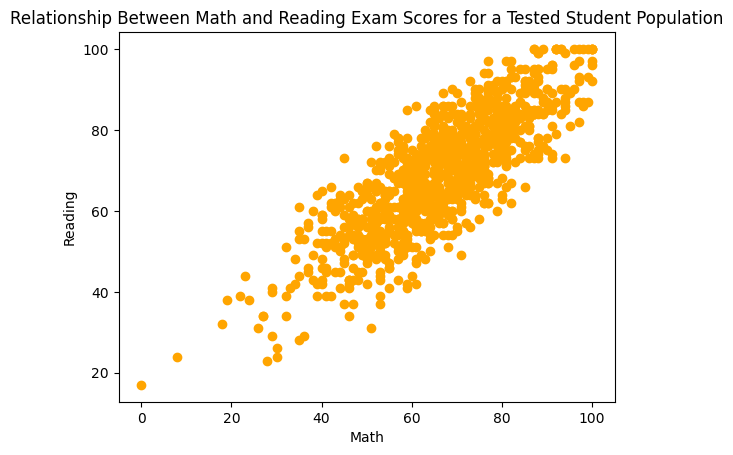

In [23]:
# New-to-you code
# Make the scatter plot to compare Math and Reading exam scores to see if there appears to be any relationship
plt.scatter(Math, Reading, c = "orange") # You can change the color here.
plt.xlabel("Math")
plt.ylabel("Reading")
plt.title("Relationship Between Math and Reading Exam Scores for a Tested Student Population")
# Insert a line here to save the DV to a file called "Math_and_Reading_Exams-Scatter_Plot-Python.png" and document what that code line is for.
plt.savefig("Math_and_Reading_Exams-Scatter_Plot-Python.png")
plt.show()

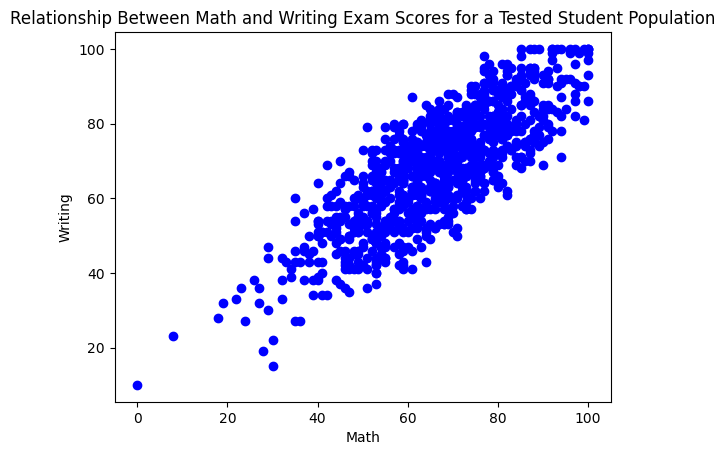

In [24]:
# New-to-you code
# Make the scatter plot to compare Math and Writing exam scores to see if there appears to be any relationship
plt.scatter(Math, Writing, c = "blue") # You can change the color here.
plt.xlabel("Math")
plt.ylabel("Writing")
plt.title("Relationship Between Math and Writing Exam Scores for a Tested Student Population")
# Insert a line here to save the DV to a file called "Math_and_Writing_Exams-Scatter_Plot-Python.png" and document what that code line is for.
plt.savefig("Math_and_Writing_Exams-Scatter_Plot-Python.png")
plt.show()

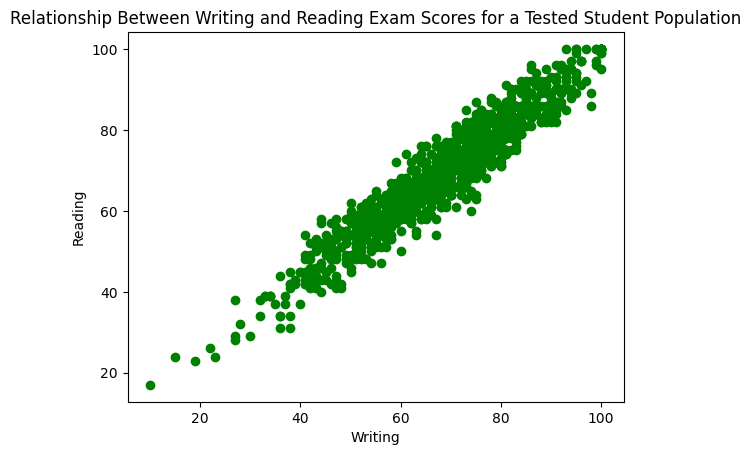

In [25]:
# New-to-you code
# Make the scatter plot to compare Writing and Reading exam scores to see if there appears to be any relationship
plt.scatter(Writing, Reading, c = "green") # You can change the color here.
plt.xlabel("Writing")
plt.ylabel("Reading")
plt.title("Relationship Between Writing and Reading Exam Scores for a Tested Student Population")
# Insert a line here to save the DV to a file called "Writing_and_Reading_Exams-Scatter_Plot-Python.png" and document what that code line is for.
plt.savefig("Writing_and_Reading_Exams-Scatter_Plot-Python.png")
plt.show()

In [26]:
# New-to-you code
# Generate a correlation matrix of R-squared scores, also called correlation coefficients, which allows us to determine if there is any relationship between the variables.
# Correlation coefficients range from -1 to +1, where the extremes indicate a strong relationship and 0 indicates the absence of a relationship.
# A negative correlation coefficient indicates that the variables move in oppposite directions in relation to each other (i.e., higher values of one are associated with lower values of the other).
# A positive correlation coefficient indicates that the variables move in the same direction in relation to each other (i.e., higher values of one are associated with higher values of the other; and lower values of one are associated with lower values of the other).
scatter.corr()

,Math,Reading,Writing
Math,1.000000,0.817580,0.802642
Reading,0.817580,1.000000,0.954598
Writing,0.802642,0.954598,1.000000


In [34]:
# Space intentionally blank to separate sections.

In [35]:
# Space intentionally blank to separate sections.

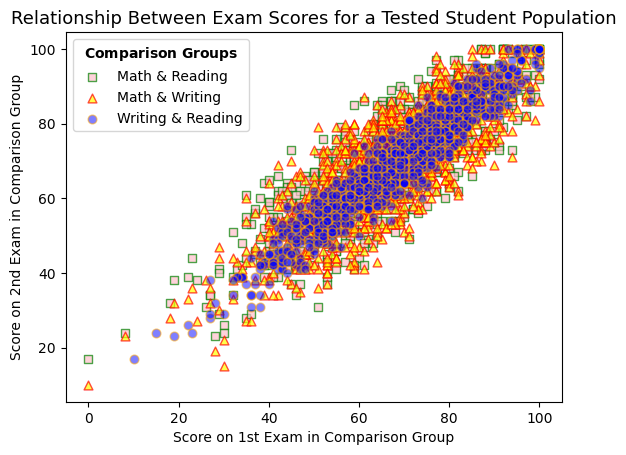

In [27]:
# Additional exercises for ADVANCED students (optional).
# Try to put all of the exam comparisons on the same plot.
# If you use the DVs that are generated from this advanced code block in your assignment or deliverable, don't forget to discuss the correlation coefficients that you generated earlier.
# You can experiment with changing colors and other customizations.
plt.scatter(Math, Reading, c ="pink",
            label = "Math & Reading",
            linewidths = 1,
            marker ="s",
            edgecolor ="green",
            alpha = 0.7, # To increase or decrease the opacity of the points.
            s = 40) # To increase or decrease the size of the points.
 
plt.scatter(Math, Writing, c ="yellow",
            label = "Math & Writing",
            linewidths = 1,
            marker ="^",
            edgecolor ="red",
            alpha = 0.7, # To increase or decrease the opacity of the points.
            s = 40) # To increase or decrease the size of the points.

plt.scatter(Writing, Reading, c ="blue",
            label = "Writing & Reading",
            linewidths = 1,
            marker ="o",
            edgecolor ="orange",
            alpha = 0.5, # To increase or decrease the opacity of the points.
            s = 40) # To increase or decrease the size of the points.
 
plt.xlabel("Score on 1st Exam in Comparison Group")
plt.ylabel("Score on 2nd Exam in Comparison Group")
plt.title("Relationship Between Exam Scores for a Tested Student Population", size="13") # You can customize the chart title and font size here.
plt.legend(loc="best", title="$\\bf{Comparison}$ $\\bf{Groups}$") # For adding bolding.
# Insert a line here to save the DV to a file called "Math_Reading_Writing_Exams-Scatter_Plot-Python.png" and document what that code line is for.
plt.savefig("Math_Reading_Writing_Exams-Scatter_Plot-Python.png")
plt.show()

# experiment with cusomtizing line marker types:
# https://matplotlib.org/stable/api/markers_api.html
# experiment with other line argument options: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [37]:
# Space intentionally blank to separate sections.

In [38]:
# Space intentionally blank to separate sections.

In [39]:
# Space intentionally blank to separate sections.

In [40]:
# Space intentionally blank to separate sections.

In [29]:
# Additional exercises for ADVANCED students only (optional).
# Not all code steps are listed and you have to rely on what you have learned above in earlier steps (such as renaming variables to optimize for data visualization, etc.).
# Do not include in your assignment without optimizing all of the chart components by inserting your own code that you learned from the current and past class sessions.
# Load the Advanced dataset
data = pd.read_csv('student_performance-advanced.csv')
# Take a look at the data
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [30]:
# Define and segregate the categorical variables and the numeric variables of the Advanced dataset.
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
num_cols = ['math score', 'reading score', 'writing score']
# Don't forget to rename the variables on your own.

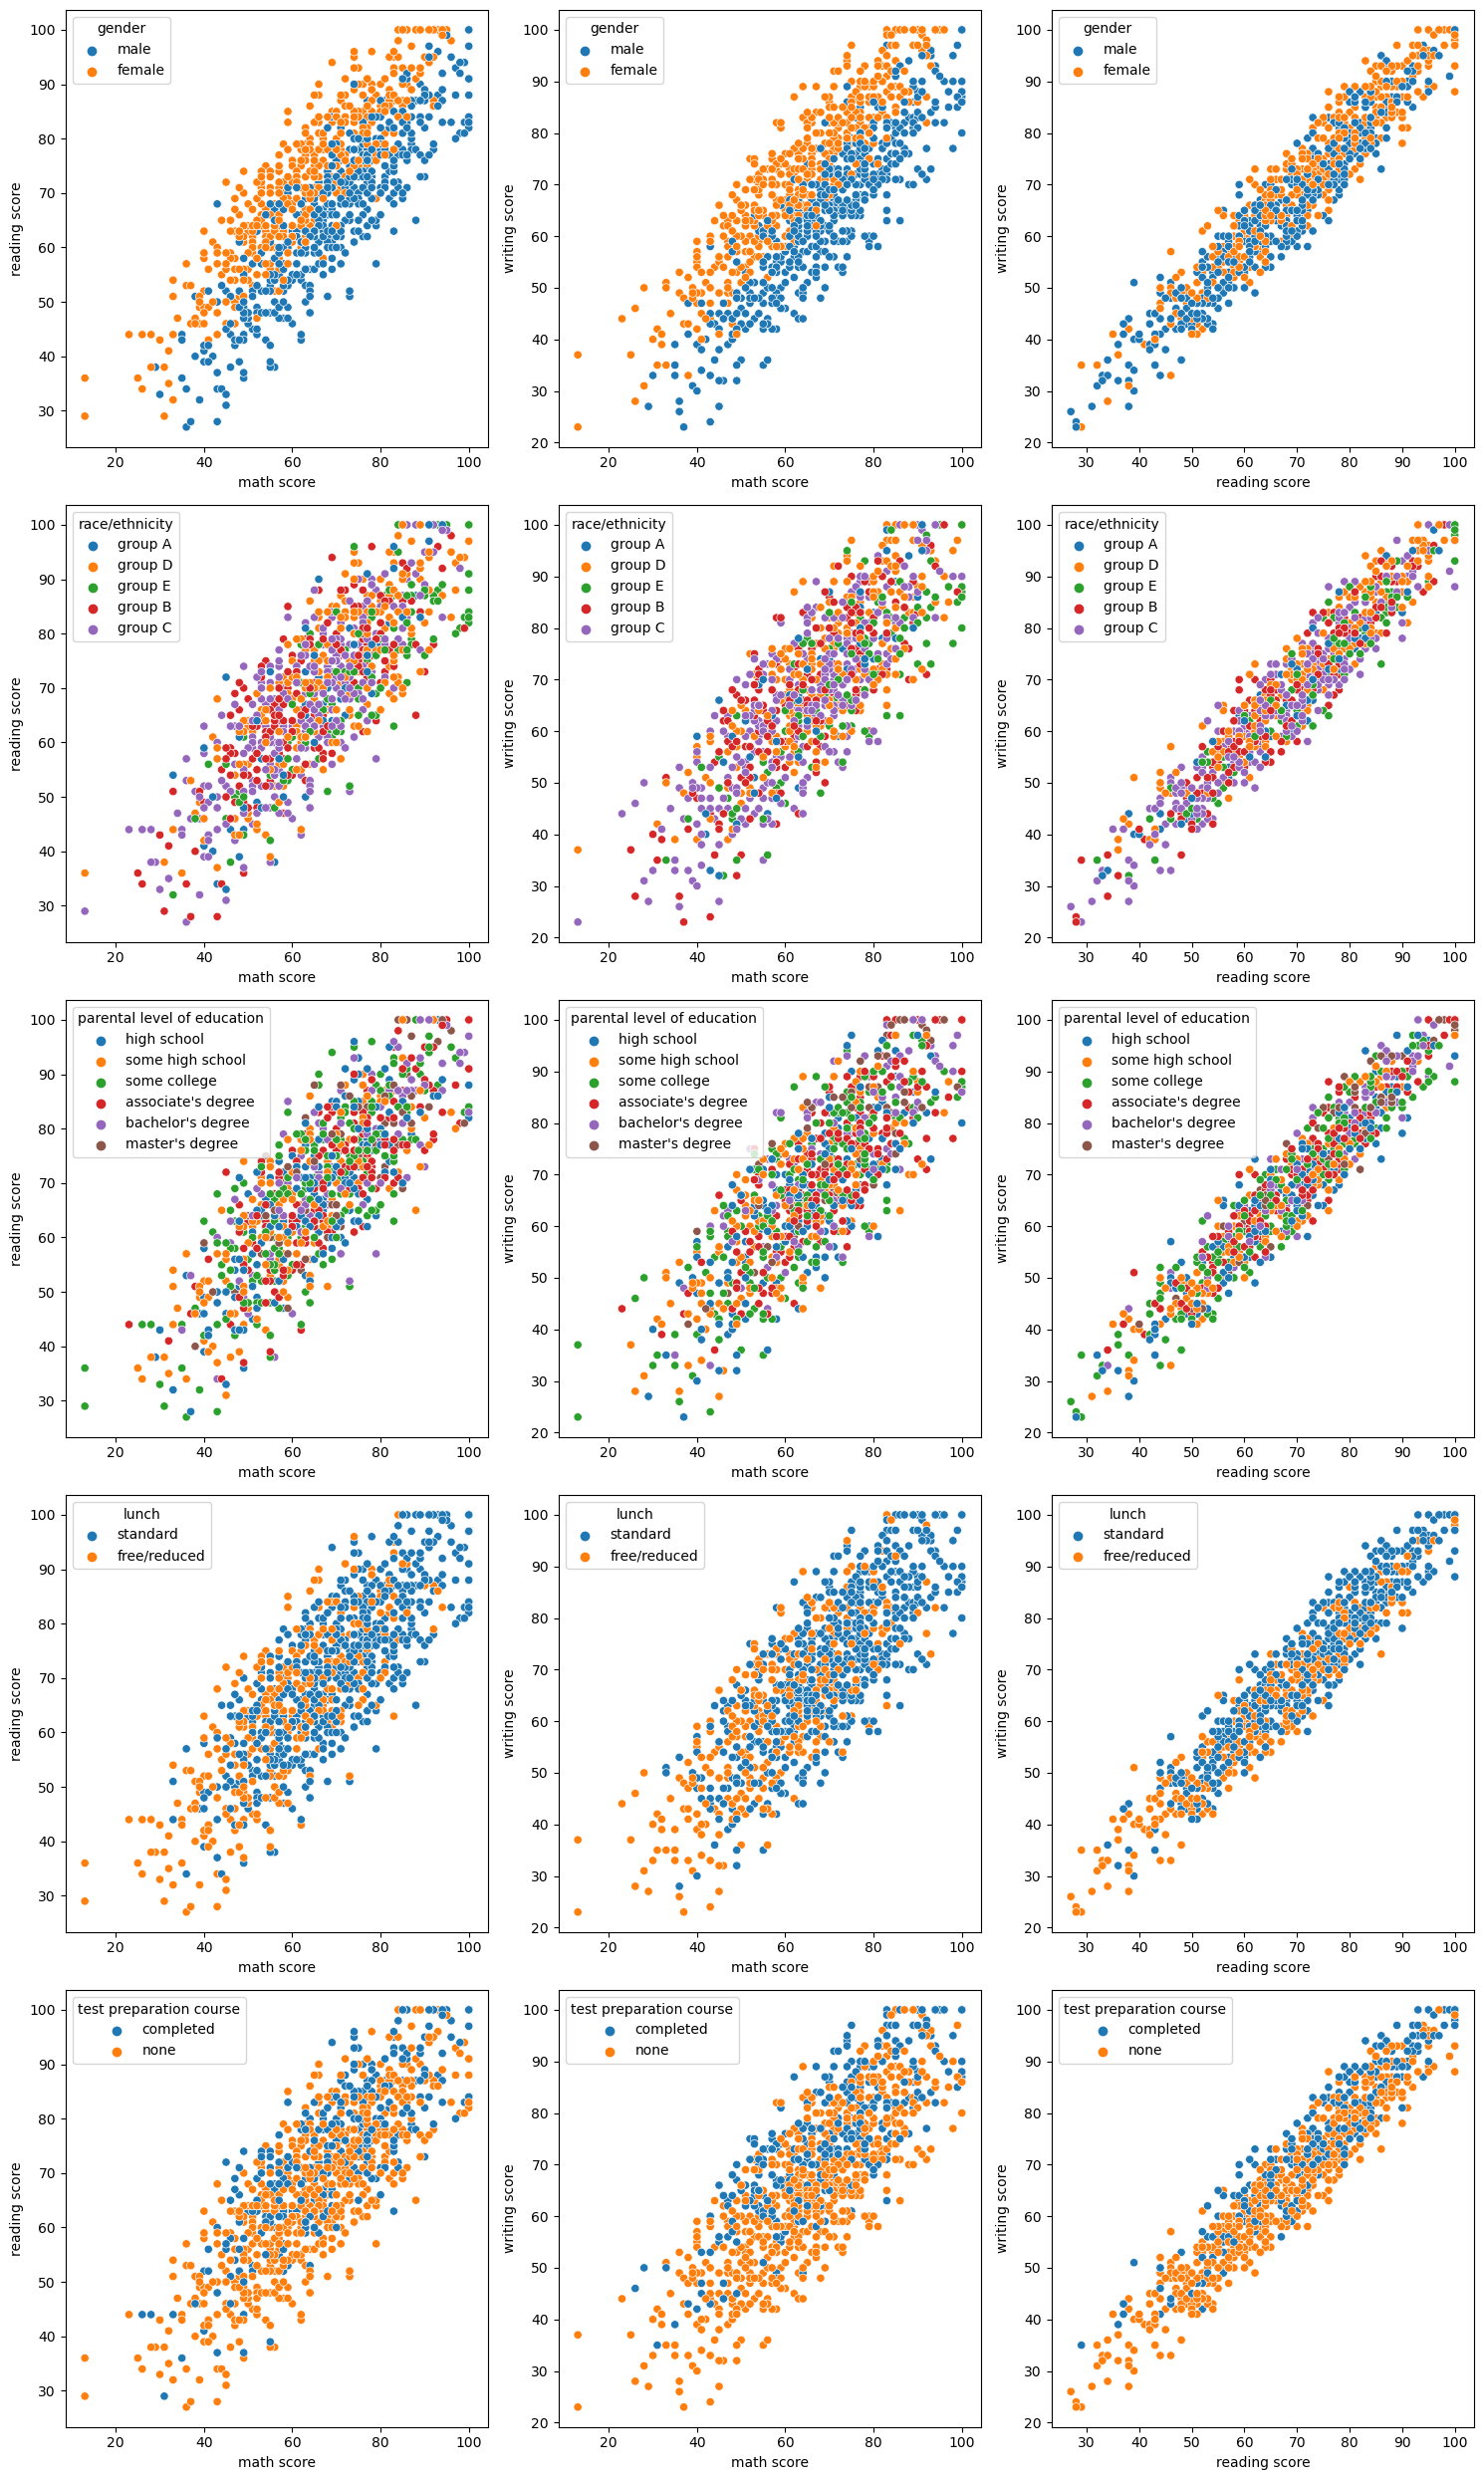

In [31]:
# Generate a scatter plot for each combination of categorical variable by exam type.
# This code block is NOT fully documented. You (the advanced student) need to fully document this code block before using it to use it for training and sharing purposes.
# Don't forget to add code to optimize all components of the charts before use (e.g., add optimal chart titles, improve axis titles and legend titles, optimize font sizes, etc.).
# If you want to discuss the correlation coefficients for these variables in this advanced dataset, you must first generate a correlation matrix like you learned above; then you will be able to determine if and where there is any relationship between variables.
num_pairs = [[num_cols[0], num_cols[1]], 
         [num_cols[0], num_cols[2]], 
         [num_cols[1], num_cols[2]]]

fix, ax = plt.subplots(figsize=(15,25), nrows=5, ncols=3)

for i,p in enumerate(num_pairs):
    for j,hue in enumerate(cat_cols):
        sns.scatterplot(data=data, x=p[0], y=p[1], hue=hue, ax=ax[j,i])

plt.tight_layout()
plt.savefig("scatter plot for each combination of categorical variable by exam type.png")
plt.show()